**#0 Importy i wczytanie baz**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

movies_database = pd.read_csv('tmdb_movies.csv')
movies_database.head(3)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0


In [17]:
genres_database = pd.read_csv('tmdb_genres.csv')
genres_database.head(3)

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy


**#1 Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów**

In [12]:
number_votes = movies_database['vote_count'].quantile(0.75)
best_movies = movies_database[movies_database['vote_count'] > number_votes]
top_movies = best_movies.nlargest(10, 'vote_average')
print(top_movies[['title', 'vote_average', 'vote_count']])

                         title  vote_average  vote_count
1881  The Shawshank Redemption           8.5        8205
3337             The Godfather           8.4        5893
662                 Fight Club           8.3        9413
1818          Schindler's List           8.3        4329
2294             Spirited Away           8.3        3840
2731    The Godfather: Part II           8.3        3338
3232              Pulp Fiction           8.3        8428
3865                  Whiplash           8.3        4254
65             The Dark Knight           8.2       12002
690             The Green Mile           8.2        4048


**#2 Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej**

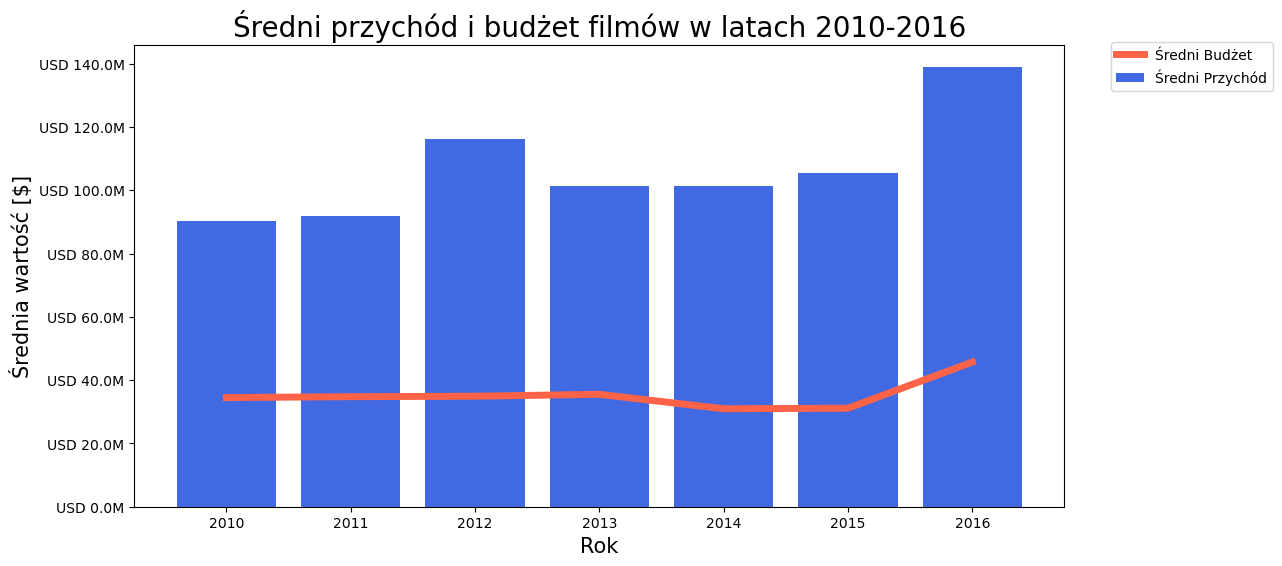

In [37]:
#konwersja kolumny na typ daty:
movies_database['release_date'] = pd.to_datetime(movies_database['release_date'], errors='coerce')

#filtrowanie dat:
movies_filtered = movies_database[
    (movies_database['release_date'].dt.year >= 2010) &
    (movies_database['release_date'].dt.year <= 2016)
]

#grupowanie przychodu i budżetu:
grouped = movies_filtered.groupby(movies_filtered['release_date'].dt.year).agg({
    'revenue': 'mean',
    'budget': 'mean'
}).reset_index()

#wykres:
plt.figure(figsize=(12, 6))
plt.bar(grouped['release_date'], grouped['revenue'], color='royalblue', label='Średni Przychód')
plt.plot(grouped['release_date'], grouped['budget'], color='tomato', linewidth=5, label='Średni Budżet')

#formatowanie wykresu:
plt.title('Średni przychód i budżet filmów w latach 2010-2016', size = 20)
plt.xlabel('Rok', size = 15)
plt.ylabel('Średnia wartość [$]', size = 15)
plt.legend(loc = (1.05, 0.9))

#oś Y
def millions (x, pos):
    return 'USD {:2.1f}M'.format(x*1e-6)
formatter = plt.FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter) 
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2e7))

plt.show()

**#3 Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu**

In [49]:
movies_with_genres = movies_database.merge(genres_database, left_on='genre_id', right_on='Unnamed: 0', how='left')
movies_with_genres = movies_with_genres.drop(columns=['Unnamed: 0_y'])
movies_with_genres.head(3)                                           

,Unnamed: 0_x,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action


**#4 Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?**

In [54]:
most_common_genre = movies_with_genres['genres'].value_counts().idxmax()
count_most_common_genre = movies_with_genres['genres'].value_counts().max()
print(f'Najczęściej występujący gatunek: {most_common_genre} ({count_most_common_genre} filmów)')

Najczęściej występujący gatunek: Drama (1207 filmów)


**#5 Filmy, którego gatunku trwają średnio najdłużej (runtime)?**

In [59]:
longest_runtime_genre = movies_with_genres.groupby('genres')['runtime'].mean().idxmax()
print(f'Gatunek z najdłuższym średnim czasem trwania: {longest_runtime_genre}')

Gatunek z najdłuższym średnim czasem trwania: History


**#6 Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania**

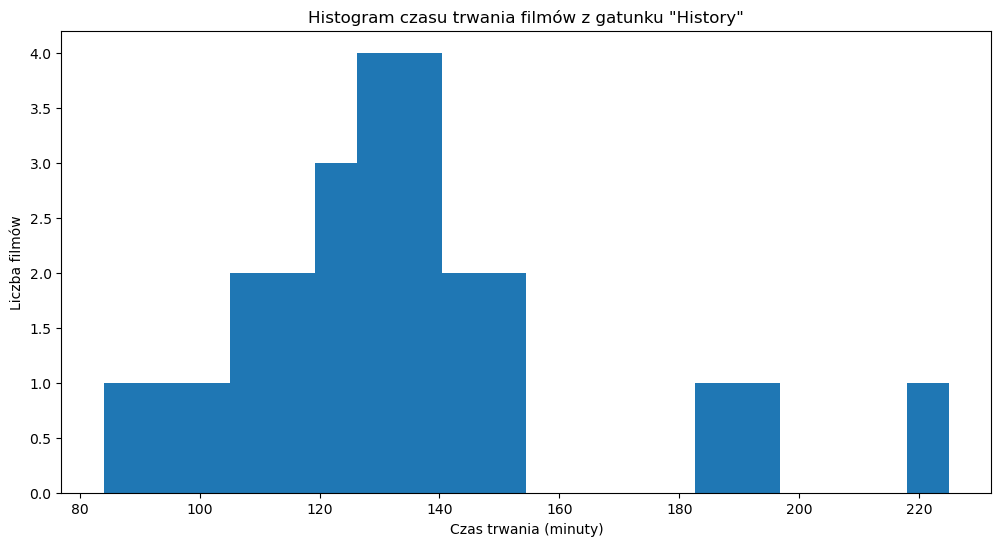

In [66]:
#filtrowanie dla gatunku 'History'
history_movies = movies_with_genres[movies_with_genres['genres'] == 'History']

# Tworzenie histogramu czasu trwania filmów z gatunku 'History'
plt.figure(figsize=(12, 6))
plt.hist(history_movies['runtime'].dropna(), bins=20)
plt.title('Histogram czasu trwania filmów z gatunku "History"')
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.show()